## Capstone Project – The Battle of Neighborhoods - Finding a Better Place in Scarborough, Toronto

### 1. Import Python Libraries 


In [1]:
# import libraries

import requests
import pandas as pd
import numpy as np
import geocoder
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
import xml
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from bs4 import BeautifulSoup
from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 2. Data Cleaning and preparation

Scraping List of Postal Codes of Given Wikipedia Page. Link through BeautifulSoup : https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

In [2]:
# read the webpage from the wiki
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
response = requests.get(url)
#Process and convert html data
data = response.text
soup = BeautifulSoup(data,'html.parser')
wiki_table=soup.find('table')
#develop dataframe
df = pd.read_html(str(wiki_table))[0]
df.head()

,0,1,2,3,4,5,6,7,8
0,M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park(Ontario Provincial Government),M8ANot assigned,M9AEtobicoke(Islington Avenue)
1,M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Garden...
2,M1CScarborough(Rouge Hill / Port Union / Highl...,M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Ol...
3,M1EScarborough(Guildwood / Morningside / West ...,M2ENot assigned,M3ENot assigned,M4EEast Toronto(The Beaches),M5EDowntown Toronto(Berczy Park),M6EYork(Caledonia-Fairbanks),M7ENot assigned,M8ENot assigned,M9ENot assigned
4,M1GScarborough(Woburn),M2GNot assigned,M3GNot assigned,M4GEast York(Leaside),M5GDowntown Toronto(Central Bay Street),M6GDowntown Toronto(Christie),M7GNot assigned,M8GNot assigned,M9GNot assigned


In [3]:
# convert the above table to list
my_list = df.values.tolist()

In [4]:
# create a new list called my_new_list -- convert multiple lists to a single list
my_new_list = []
# Next we want to iterate over the outer list
for sub_list in my_list:
    # Now go over each item of the sublist
    for item in sub_list:
        # append it to our new list
        my_new_list.append(item)

In [5]:
# check my_new_list
print(my_new_list)

['M1ANot assigned', 'M2ANot assigned', 'M3ANorth York(Parkwoods)', 'M4ANorth York(Victoria Village)', 'M5ADowntown Toronto(Regent Park / Harbourfront)', 'M6ANorth York(Lawrence Manor / Lawrence Heights)', "M7AQueen's Park(Ontario Provincial Government)", 'M8ANot assigned', 'M9AEtobicoke(Islington Avenue)', 'M1BScarborough(Malvern / Rouge)', 'M2BNot assigned', 'M3BNorth York(Don Mills)North', 'M4BEast York(Parkview Hill / Woodbine Gardens)', 'M5BDowntown Toronto(Garden District, Ryerson)', 'M6BNorth York(Glencairn)', 'M7BNot assigned', 'M8BNot assigned', 'M9BEtobicoke(West Deane Park / Princess Gardens / Martin Grove / Islington / Cloverdale)', 'M1CScarborough(Rouge Hill / Port Union / Highland Creek)', 'M2CNot assigned', 'M3CNorth York(Don Mills)South(Flemingdon Park)', 'M4CEast York(Woodbine Heights)', 'M5CDowntown Toronto(St. James Town)', 'M6CYork(Humewood-Cedarvale)', 'M7CNot assigned', 'M8CNot assigned', 'M9CEtobicoke(Eringate / Bloordale Gardens / Old Burnhamthorpe / Markland Woo

In [6]:
# split postalcode and Borough
def split_var(s, n=3):
    frist_N = s[:n] # select the first 3 characters from left
    after_N = s[n:] # select the rest of characters
    return frist_N, after_N

In [7]:
# create postalcode list and Borough list
Postalcode_list = []
Borough_list = []
for i in my_new_list:
    Postalcode_value, Borough_value = split_var(i, n=3)
    
    Postalcode_list.append(Postalcode_value)
    Borough_list.append(Borough_value)

In [8]:
# split Borough and Neigbourhood
def split_var2(s):
    if s == "Not assigned":
        value_1 = s
        value_3 = s
    else:    
        first_N = s.split('(') # split value by '('
        value_1 = first_N[0]
        value_2 = first_N[1].replace(')', ' ') # replace ')' with blank
        value_3 = value_2.replace(' /', ',') # replace '/' with ','
    return value_1, value_3

In [9]:
# create Borough list and Neighborhood list
Borough_2_list= []
Neighborhood_list= []
for i in Borough_list:
    Borough_2_value, Neighborhood_value = split_var2(i)
    
    Borough_2_list.append(Borough_2_value)
    Neighborhood_list.append(Neighborhood_value)

In [10]:
df_clean = pd.DataFrame()
df_clean['Postalcode'] = Postalcode_list
df_clean['Borough'] = Borough_2_list
df_clean['Neighborhood'] = Neighborhood_list

In [11]:
# check the clean dataset shape
print(df_clean.shape)

# check the clean dataset
df_clean.head(12)

(180, 3)


,Postalcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Queen's Park,Ontario Provincial Government
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,"Malvern, Rouge"


In [12]:
# remove not assigned from Borough
df_clean_final = df_clean[df_clean['Borough']!= 'Not assigned']

In [13]:
# check the final clean dataset 
df_clean_final.head(12)

,Postalcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Queen's Park,Ontario Provincial Government
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills North
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [14]:
# check the final clean dataset shape
df_clean_final.shape

(103, 3)

In [15]:
# check number of unique Postalcode
print('Number of Postalcode in the table is: ' + str(df_clean_final.shape[0]))
print('Number of Unique Postalcode value is: ' + str(df_clean_final.Postalcode.nunique()))

Number of Postalcode in the table is: 103
Number of Unique Postalcode value is: 103


In [16]:
df_clean_final.describe()

,Postalcode,Borough,Neighborhood
count,103,103,103
unique,103,15,103
top,M5S,North York,"The Annex, North Midtown, Yorkville"
freq,1,24,1


In [17]:
def neighborhood_list(grouped):    
    return ', '.join(sorted(grouped['Neighborhood'].tolist()))
                    
grp = df_clean_final.groupby(['Postalcode', 'Borough'])
df_clean_final_2 = grp.apply(neighborhood_list).reset_index(name='Neighborhood')

In [18]:
df_clean_final_2.describe()

,Postalcode,Borough,Neighborhood
count,103,103,103
unique,103,15,103
top,M5S,North York,"Lawrence Manor, Lawrence Heights"
freq,1,24,1


In [19]:
def get_latilong(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code))
        lati_long_coords = g.latlng
    return lati_long_coords
    
get_latilong('M4G')

[43.709020000000066, -79.36348999999996]

In [20]:
# Retrieving Postal Code Co-ordinates
postal_codes = df_clean_final_2['Postalcode']    
coords = [ get_latilong(postal_code) for postal_code in postal_codes.tolist() ]

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


In [21]:
# Adding Columns Latitude & Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df_clean_final_2['Latitude'] = df_coords['Latitude']
df_clean_final_2['Longitude'] = df_coords['Longitude']

In [22]:
df_clean_final_2[df_clean_final_2.Postalcode == 'M5G']

,Postalcode,Borough,Neighborhood,Latitude,Longitude
57,M5G,Downtown Toronto,Central Bay Street,43.65609,-79.38493


In [23]:
df_clean_final_2.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.81139,-79.19662
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.78574,-79.15875
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.76575,-79.17470
3,M1G,Scarborough,Woburn,43.76812,-79.21761
4,M1H,Scarborough,Cedarbrae,43.76944,-79.23892


In [24]:
address = 'Scarborough, Toronto'

geolocator = Nominatim(user_agent = "address")
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The Geograpical Co-ordinate of Seattle,Washington are {}, {}.'.format(latitude_x, longitude_y))

The Geograpical Co-ordinate of Seattle,Washington are 43.7729744, -79.2576479.


### 3. Map of Scarborough

In [25]:
map_Scarborough = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

for lat, lng, nei in zip(df_clean_final_2['Latitude'], df_clean_final_2['Longitude'], df_clean_final_2['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Scarborough)  
    
map_Scarborough

In [26]:
address = 'Scarborough,Toronto'

geolocator = Nominatim(user_agent = "address")
location = geolocator.geocode(address)
latitude_n1 = location.latitude
longitude_n1 = location.longitude
print('The Geograpical Co-ordinate of Neighborhood_1 are {}, {}.'.format(latitude_x, longitude_y))

The Geograpical Co-ordinate of Neighborhood_1 are 43.7729744, -79.2576479.


In [27]:
# @hiddel_cell
CLIENT_ID = XXXXXXXXXXXXXXXXX # your Foursquare ID
CLIENT_SECRET = XXXXXXXXXXXXXXXXXXXXXX # your Foursquare Secret
ACCESS_TOKEN = XXXXXXXXXXXXXXXXXXXXXXX # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30

In [28]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_n1, 
   longitude_n1, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [29]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.crossStreet',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.postalCode', 'venue.location.cc', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups',
       'venue.location.neighborhood', 'venue.venuePage.id'],
      dtype='object')

In [30]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### 4. Nearby Venues/Locations

In [31]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Disney Store,"[{'id': '4bf58dd8d48988d1f3941735', 'name': 'T...",43.775537,-79.256833
1,American Eagle Store,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.776012,-79.258334
2,SEPHORA,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",43.775512,-79.258288
3,Chipotle Mexican Grill,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",43.776410,-79.258069
4,Shoppers Drug Mart,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",43.773305,-79.251662


### 5. Categories of Nearby Venues/Locations

In [32]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,Disney Store,Toy / Game Store,43.775537,-79.256833
1,American Eagle Store,Clothing Store,43.776012,-79.258334
2,SEPHORA,Cosmetics Shop,43.775512,-79.258288
3,Chipotle Mexican Grill,Mexican Restaurant,43.776410,-79.258069
4,Shoppers Drug Mart,Pharmacy,43.773305,-79.251662


In [33]:
# Select Top 10 Categories
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Clothing Store       9
Restaurant           5
Coffee Shop          4
Department Store     2
Sandwich Place       2
Gas Station          2
Cosmetics Shop       2
Pharmacy             2
Gym                  1
Electronics Store    1
Name: categories, dtype: int64

In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [35]:
# Nearby Venues
Scarborough_venues = getNearbyVenues(names=df_clean_final_2['Neighborhood'],
                                   latitudes=df_clean_final_2['Latitude'],
                                   longitudes=df_clean_final_2['Longitude']
                                  )

Malvern, Rouge 
Rouge Hill, Port Union, Highland Creek 
Guildwood, Morningside, West Hill 
Woburn 
Cedarbrae 
Scarborough Village 
Kennedy Park, Ionview, East Birchmount Park 
Golden Mile, Clairlea, Oakridge 
Cliffside, Cliffcrest, Scarborough Village West 
Birch Cliff, Cliffside West 
Dorset Park, Wexford Heights, Scarborough Town Centre 
Wexford, Maryvale 
Agincourt 
Clarks Corners, Tam O'Shanter, Sullivan 
Milliken, Agincourt North, Steeles East, L'Amoreaux East 
Steeles West, L'Amoreaux West 
Upper Rouge 
Hillcrest Village 
Fairview, Henry Farm, Oriole 
Bayview Village 
York Mills, Silver Hills 
Willowdale, Newtonbrook 
Willowdale South
York Mills West 
Willowdale West
Parkwoods 
Don Mills North
Don Mills South
Bathurst Manor, Wilson Heights, Downsview North 
Northwood Park, York University 
Downsview East 
Downsview West
Downsview Central
Downsview Northwest
Victoria Village 
Parkview Hill, Woodbine Gardens 
Woodbine Heights 
The Beaches 
Leaside 
Thorncliffe Park 
The Danforth Ea

In [36]:
print('There are {} Uniques Categories.'.format(len(Scarborough_venues['Venue Category'].unique())))
Scarborough_venues.groupby('Neighborhood').count().head()

There are 303 Uniques Categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,21,21,21,21,21,21
"Alderwood, Long Branch",7,7,7,7,7,7
"Bathurst Manor, Wilson Heights, Downsview North",14,14,14,14,14,14
Bayview Village,6,6,6,6,6,6
"Bedford Park, Lawrence Manor East",27,27,27,27,27,27


#### PS: One Hot Encoding Features

In [37]:
# one hot encoding
Scarborough_onehot = pd.get_dummies(Scarborough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Scarborough_onehot['Neighborhood'] = Scarborough_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Scarborough_onehot.columns[-1]] + list(Scarborough_onehot.columns[:-1])
Scarborough_onehot = Scarborough_onehot[fixed_columns]
Scarborough_grouped = Scarborough_onehot.groupby('Neighborhood').mean().reset_index()
Scarborough_onehot.head()

,Zoo Exhibit,Accessories Store,African Restaurant,Airport,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stationery Store,Steakhouse,Storage Facility,Street Art,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai 

In [38]:
num_top_venues = 5
for hood in Scarborough_grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp =Scarborough_grouped[Scarborough_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Agincourt  ----
                       venue  freq
0              Shopping Mall  0.10
1            Bubble Tea Shop  0.05
2                       Bank  0.05
3  Latin American Restaurant  0.05
4           Sushi Restaurant  0.05


---- Alderwood, Long Branch  ----
         venue  freq
0          Pub  0.14
1  Coffee Shop  0.14
2          Gym  0.14
3   Playground  0.14
4  Pizza Place  0.14


---- Bathurst Manor, Wilson Heights, Downsview North  ----
               venue  freq
0        Coffee Shop  0.14
1               Park  0.14
2  Convenience Store  0.07
3   Sushi Restaurant  0.07
4      Deli / Bodega  0.07


---- Bayview Village  ----
                venue  freq
0  Golf Driving Range  0.17
1         Flower Shop  0.17
2                Park  0.17
3               Trail  0.17
4         Gas Station  0.17


---- Bedford Park, Lawrence Manor East  ----
                venue  freq
0         Coffee Shop  0.07
1      Sandwich Place  0.07
2  Italian Restaurant  0.07
3    Greek Restaurant  0.04


In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### 5. Most Common venues near neighbourhood

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Scarborough_grouped['Neighborhood']

for ind in np.arange(Scarborough_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Scarborough_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Shopping Mall,Hong Kong Restaurant,Badminton Court,Bank,Sushi Restaurant,Supermarket,Latin American Restaurant,Breakfast Spot,Bubble Tea Shop,Sandwich Place
1,"Alderwood, Long Branch",Coffee Shop,Gym,Gas Station,Pub,Playground,Pizza Place,Sandwich Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Park,Sandwich Place,Convenience Store,Pizza Place,Middle Eastern Restaurant,Mediterranean Restaurant,Deli / Bodega,Mobile Phone Shop,Restaurant
3,Bayview Village,Golf Driving Range,Asian Restaurant,Gas Station,Park,Trail,Flower Shop,Curling Ice,Farm,Electronics Store,Escape Room
4,"Bedford Park, Lawrence Manor East",Sandwich Place,Italian Restaurant,Coffee Shop,Comfort Food Restaurant,Indian Restaurant,Butcher,Pizza Place,Boutique,Liquor Store,Sports Club


### 6. K-Means Clustering Approach

In [41]:
# Using K-Means to cluster neighborhood into 3 clusters
Scarborough_grouped_clustering = Scarborough_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(Scarborough_grouped_clustering)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], dtype=int32)

In [42]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Scarborough_merged =df_clean_final_2.iloc[:16,:]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Scarborough_merged = Scarborough_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Scarborough_merged.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.81139,-79.19662,1,Zoo Exhibit,Fast Food Restaurant,Construction & Landscaping,Creperie,Cosmetics Shop,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.78574,-79.15875,1,Bar,Construction & Landscaping,Fish & Chips Shop,Farmers Market,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.76575,-79.17470,2,Park,Gymnastics Gym,Gym / Fitness Center,Athletics & Sports,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant
3,M1G,Scarborough,Woburn,43.76812,-79.21761,0,Coffee Shop,Park,Chinese Restaurant,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space
4,M1H,Scarborough,Cedarbrae,43.76944,-79.23892,0,Bakery,Hakka Restaurant,Caribbean Restaurant,Gas Station,Athletics & Sports,Bank,Thai Restaurant,Playground,Field,Fast Food Restaurant


#### 6.1 Map of Clusters

In [43]:
kclusters = 10

# create map
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(Scarborough_merged['Latitude'], 
                                   Scarborough_merged['Longitude'], 
                                   Scarborough_merged['Neighborhood'], 
                                   Scarborough_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#4856fb', '#10a2f0', '#2adddd', '#62fbc4', '#9cfba4', '#d4dd80', '#ffa256', '#ff562c', '#ff0000']


In [44]:
df_temp_1=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 0,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]
df_temp_2=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 1,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]
df_temp_3=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 2,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]

In [47]:
Scarborough_Avg_HousingPrice=pd.DataFrame({"Neighborhood":df_clean_final_2["Neighborhood"],
                                      "Average_Housing_Price":[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0,433500.0,
                                                               435000.0,289500.0,265000.0,285900.0,239400.0,
                                                               589900.0,295000.0,380500.0,378500.0,438500.0,229200.0,
                                                               229200.0,365000.0,388500.,285400.0,493500.0,477500.0,378000.0,316600.0,195000.0,225900.0,219400.0,
                                                               573900.0,367000.0,370500.0,370500.0,363500.0,279200.0,
                                                               279200.0,271000.0,370500.,255400.0,383500.0,433500.0,335000.0,286600.0,185000.0,225900.0,219400.0,
                                                               573900.0,329000.0,370500.0,370500.0,533500.0,279200.0,
                                                               279200.0,375000.0,370500.,255400.0,493500.0,433500.0,335000.0,286600.0,165000.0,225900.0,219400.0,
                                                               573900.0,425000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,195000.0,370500.,255400.0,403500.0,433500.0,335000.0,286600.0,187000.0,225900.0,219400.0,
                                                               573900.0,325000.0,370500.0,370500.0,333500.0,279200.0,
                                                               279200.0,289000.0,370500.,255400.0,413500.0,433500.0,254800.0
                                                              
                                                              
                                                              ]})

In [48]:
Scarborough_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)

<AxesSubplot:xlabel='Neighborhood'>

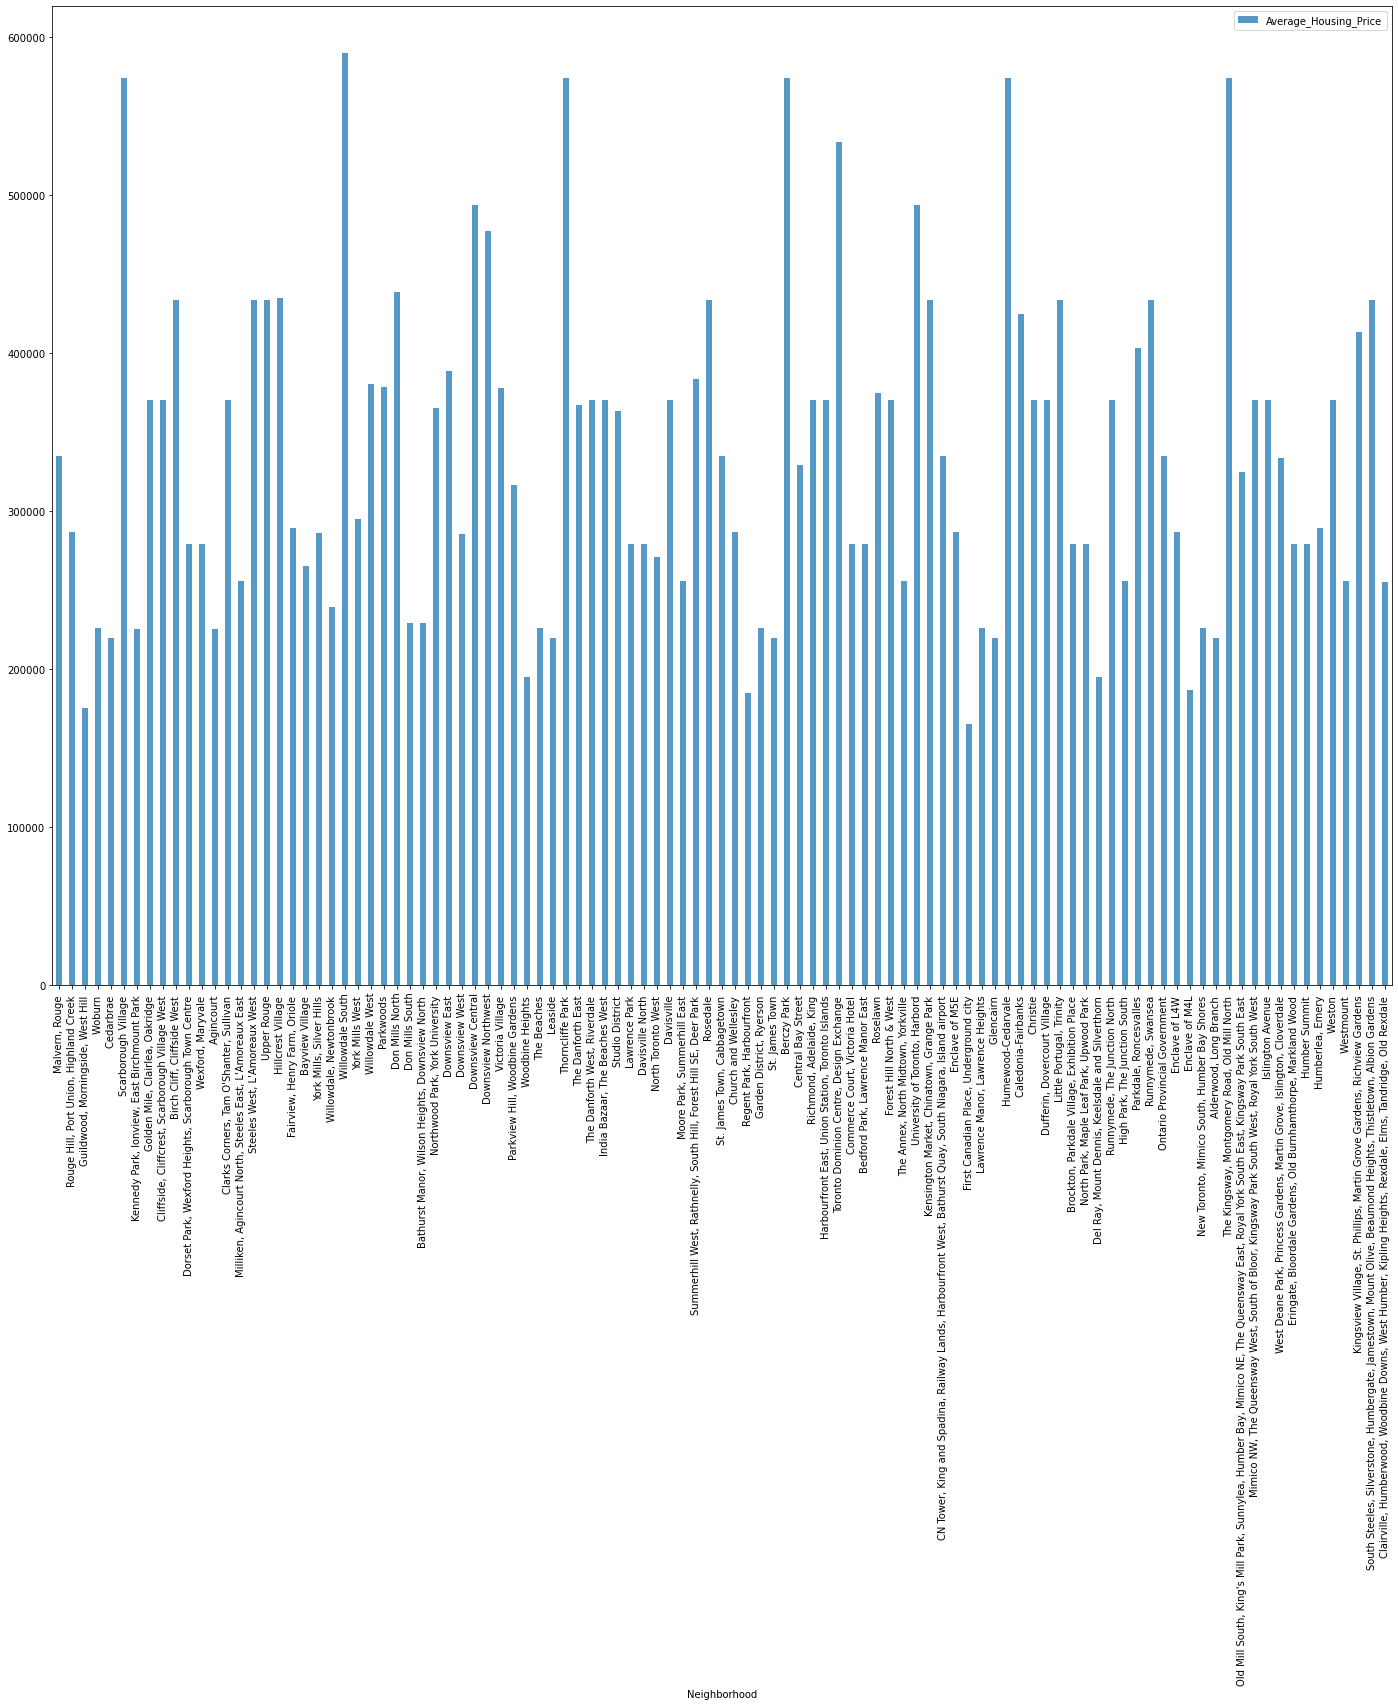

In [49]:
Scarborough_Avg_HousingPrice.plot(kind='bar',figsize=(24,18),alpha=0.75)

#### 6.2 School Rating by Clusters

In [50]:
clusters=pd.DataFrame({"Cluster1":df_temp_1["Neighborhood"],
                      "Cluster2":df_temp_2["Neighborhood"],
                      "Cluster4":df_temp_3["Neighborhood"]})
clusters = clusters.replace(np.nan, '', regex=True)

In [52]:
new_Scarborough=Scarborough_merged.set_index("Neighborhood",drop=True)
#Source:https://www.greatschools.org
Scarborough_school_ratings=pd.DataFrame({"Neighborhood":df_clean_final_2["Neighborhood"],
                                      "Top School Rating":[7,9,5,8,10,10,7,10,1,2,1,2,7,2,3,2,6,
                                                           5,4,8,9,9,6,6,4,5,4,6,8,10,8,9,6,2,
                                                           10,2,5,8,9,6,6,10,8,9,1,2,3,4,5,6,9,
                                                           8,5,9,6,9,6,4,8,10,2,5,6,3,9,8,7,
                                                           7,8,5,8,9,1,5,4,7,2,3,6,6,9,4,8,7,
                                                           4,8,9,2,6,4,7,5,10,4,6,8,9,7,5,6,5,8,7
                                                           ]})

In [53]:
Scarborough_school_ratings.set_index('Neighborhood',inplace=True,drop=True)

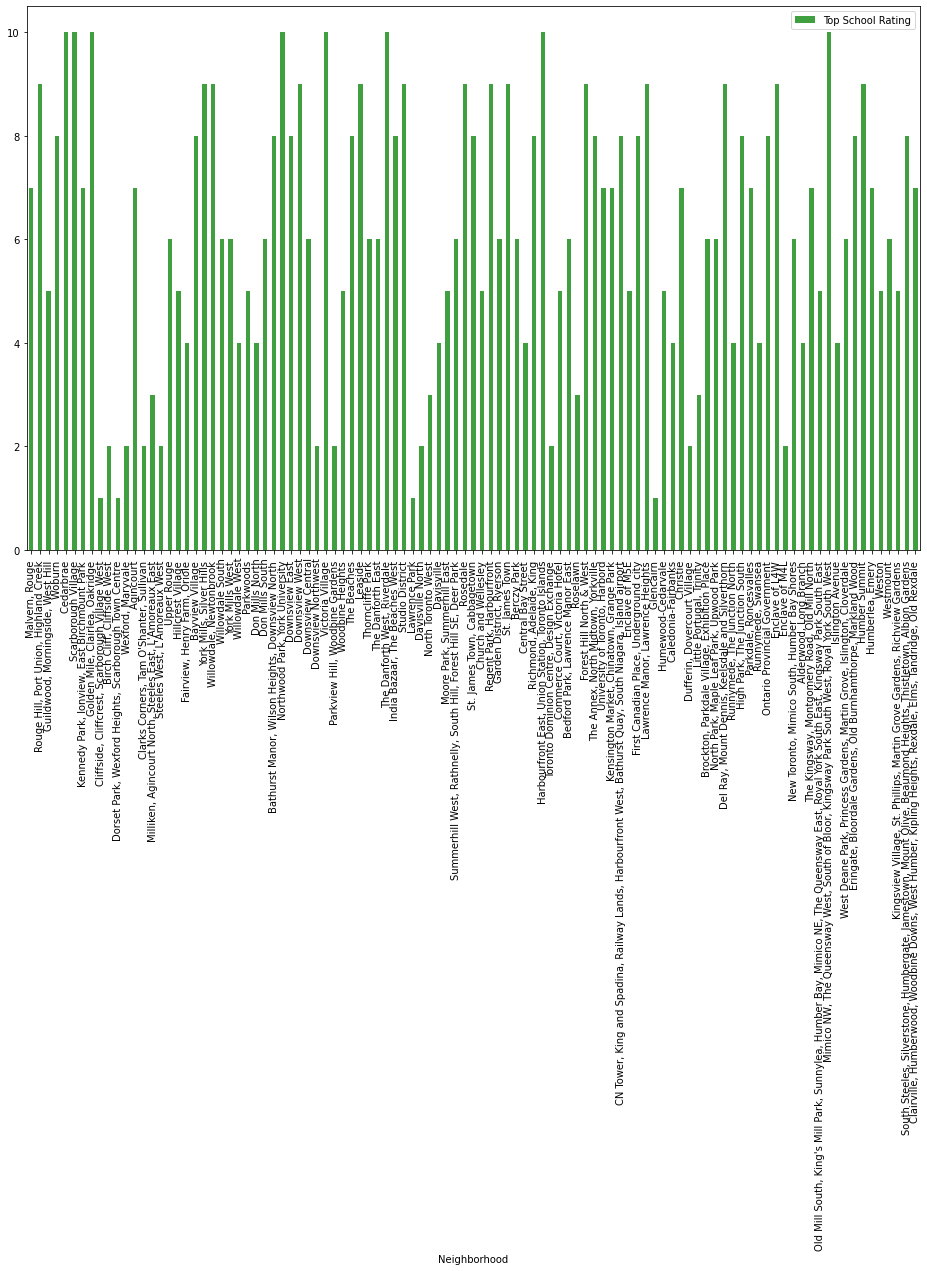

In [54]:
Scarborough_school_ratings.plot(kind='bar',figsize=(16,10),color='green',alpha=0.75);

### 7. Conclusion

In this project, I have used k-means cluster algorithm to separate the neighborhood into 10(Ten) different clusters and for 103 different lattitude and logitude from dataset, which have very-similar neighborhoods around them. Using the charts above results presented to a particular neighborhood based on average house prices and school rating have been made.